In [13]:
import matplotlib
matplotlib.__version__

'3.9.2'

In [25]:
matplotlib.__version__

'3.9.2'

In [26]:
import matplotlib.pyplot as plt
import numpy as np

In [27]:
# Workflow:
# fit calls net input.
# net_input gets passed to activation
#

class AdalineGD:
  """Adaptive Linear Neuron Classifier

  Parameters
  -----------
  eta : float
      Learning rate (between 0.0 and 1.0)
  n_iter : int
      Passes over the training dataset.
  random_state : int
      Random number generator seed for random weight initialization

  Attributes
  -----------
  w_ : 1d-array
      Weights after fitting
  b_ : Scalar
      Bias unit after fitting
  losses : list
      Mean squared error loss function values in each epoch
  """
  def __init__(self, eta=0.01, n_iter=50, random_state=1):
    self.eta = eta
    self.n_iter = n_iter
    self.random_state = random_state

  def fit(self, X, y):
    """Fit training data

    Parameters
    -----------
    X : {array-like}, shape = [n_examples, n_features]
      Training vectors, where n_examples
      is the number of examples and n_features
      is the number of features
    y : array-like, shape = [n_examples]
      Target values

    Returns
    ---------
    self : object
    """
    rgen = np.random.RandomState(self.random_state)
    self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1])
    self.b_ = np.float_(0.)
    self.losses_ = []

    for i in range(self.n_iter):
      net_input = self.net_input(X)
      output = self.activation(net_input)
      errors = (y - output)
      # gradients = self.eta * 2.0 * X.T.dot(errors)/X.shape[0]
      self.w_ += self.eta * 2.0 * X.T.dot(errors)/X.shape[0]
      self.b_ += self.eta * 2.0 * errors.mean()
      loss = (errors**2).mean()
      self.losses_.append(loss)
    return self

  def net_input(self, X):
    """Calculate net input and outputs a vector"""
    return np.dot(X, self.w_) + self.b_

  def activation(self, X):
    """Compute linear activation. Takes in a vector and outputs a vector"""
    return X

  def predict(self, X):
    """Return class label after unit step"""
    return np.where(self.activation(self.net_input(X)) >= 0.5, 1, 0)



In [28]:
import pandas as pd
# Another way to get the iris dataset
df = pd.read_csv(
    'https://archive.ics.uci.edu/ml/'
    'machine-learning-databases/iris/iris.data',
    header=None,
    encoding='utf-8'
)
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [29]:
# Create feature and target matrix
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', 0, 1)
X = df.iloc[0:100, [0, 2]].values

In [32]:
X[:4, :]

array([[5.1, 1.4],
       [4.9, 1.4],
       [4.7, 1.3],
       [4.6, 1.5]])

In [33]:
# Feature scale and standardize X
X_std = np.copy(X)
X_std[:, 0] = (X[:, 0] - X[:, 0].mean()) / X[:, 0].std()
X_std[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()

In [22]:
# Instantiate two adaline objects
ada1 = AdalineGD(n_iter=15, eta=0.1).fit(X, y)
ada2 = AdalineGD(n_iter=15, eta=0.0001).fit(X, y)

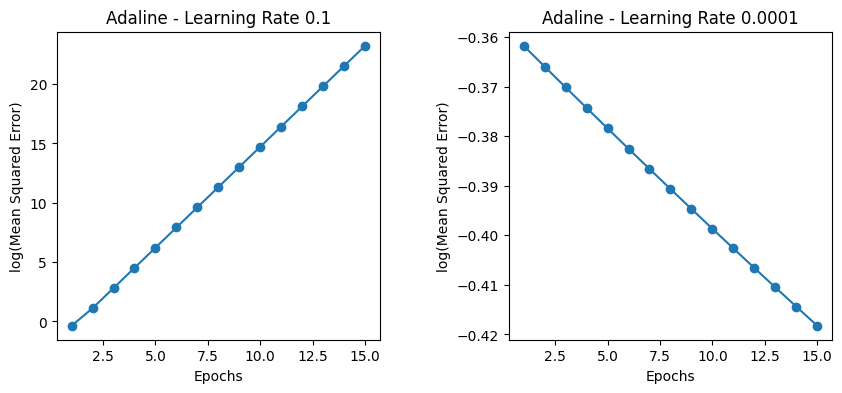

In [24]:
# plot log(mean squared error) vs epochs for ada1 and ada2
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
fig.subplots_adjust(wspace=0.4)
ax[0].plot(range(1, len(ada1.losses_) + 1),
           np.log10(ada1.losses_), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Mean Squared Error)')
ax[0].set_title('Adaline - Learning Rate 0.1')

ax[1].plot(range(1, len(ada2.losses_) + 1),
           np.log10(ada2.losses_), marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('log(Mean Squared Error)')
ax[1].set_title('Adaline - Learning Rate 0.0001')
plt.show()

In [34]:
ada_gd = AdalineGD(n_iter=20, eta=0.5)
ada_gd.fit(X_std, y)

In [35]:
# Implement a function to visualize decision boundaries for 2d datasets
from matplotlib.colors import ListedColormap

def plot_decision_boundary(X, y, classifier, resolution=0.02):
  # Set up market generator and color map
  markers = ('o', 's', '^', 'v', '<')
  colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
  cmap = ListedColormap(colors[:len(np.unique(y))])

  # plot the decision surface
  x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
  xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                         np.arange(x2_min, x2_max, resolution))
  lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
  lab = lab.reshape(xx1.shape)
  plt.contour(xx1, xx2, lab, alpha=0.3, cmap=cmap)
  plt.xlim(xx1.min(), xx1.max())
  plt.ylim(xx2.min(), xx2.max())

  for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x=X[y == cl, 0],
                y=X[y == cl, 1],
                alpha=0.8,
                c=colors[idx],
                marker=markers[idx],
                label=f'Class {cl}',
                edgecolor='black')


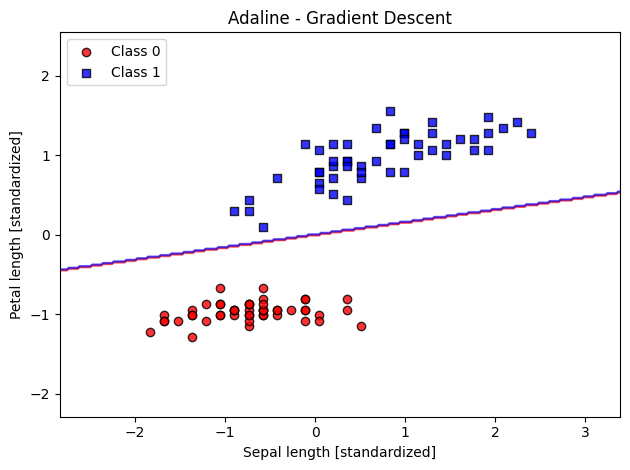

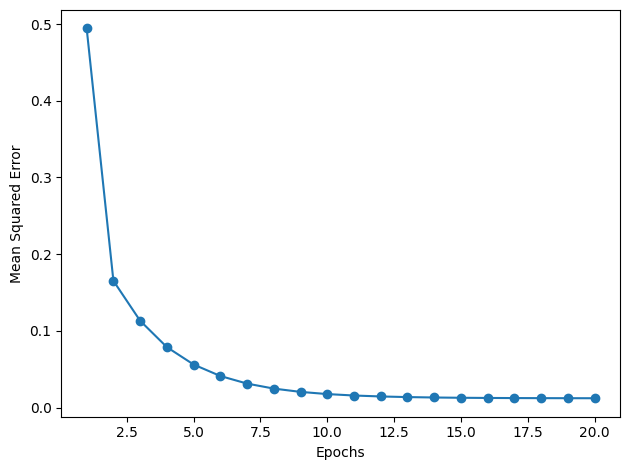

In [38]:
# Plot decision boundary and loss-epoch curve
plot_decision_boundary(X_std, y, classifier=ada_gd)
plt.title('Adaline - Gradient Descent')
plt.xlabel('Sepal length [standardized]')
plt.ylabel('Petal length [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()
plt.plot(range(1, len(ada_gd.losses_) + 1),
         ada_gd.losses_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.tight_layout()
plt.show()

In [ ]:
# Implementation of Adaline with Stochastic Gradient Descent
class AdalineSGD:
  """Adaptive Linear Neuron Classifier.

  Parameters:
  ------------
  eta : float
      Learning rate (betweemn 0.0 and 1.0)
  n_iter : int
      Passes over the training dataset
  shuffle : bool (default : True)
      Shuffles training data every epoch if True to prevent
      cycles.
  random_state : int
      Random number generator seed for random weight
      initialization

  Attributes
  -----------
  w_ : 1d-array
      Weights after fitting
  b_ : Scalar
      Bias unit after fitting
  losses_ : list
      Mean squared error loss function value averaged over all
      training examples in each epoch.
  """
  def __init__(self, eta=0.01, n_iter=10,
               shuffle=True, random_state=None):
    self.eta = eta
    self.n_iter = n_iter
    self.w_initialized = False
    self.shuffle = shuffle
    self.random_state = random_state

  def fit(self, X, y):
    """Fit the training data.

    Parameters
    ------------
    X : array-like, shape = [n_examples, n_features]
        Training vectors, where n_examples is the number of examples
        and n_features is the number of features
    y:  array-like, shape = [n_examples]
        Target values.

    Returns
    ---------
    self.object
    """
    self.initialize_weights(X.shape[1])
    self.losses_ = []
    for i in range(self.n_iter):
      if self.shuffle:
        X, y = self._shuffle(X, y)
      losses = []
      for xi, target in zip(X, y):
        losses.append(self._update_weights(xi, target))
      avg_loss = np.mean(losses)
      self.losses_.append(avg_loss)

    return self

  def partial_fit(self, X, y):
    """Fit the training data without reinitializing the weights"""
    if not self.w_inialized:
      self._initialize_weights(X.shape[1])
    if y.ravel().shape[0] > 1:
      for xi, target in zip(X, y):
        self._update_weights(xi, target)
    else:
      self._update_weights(X, y)
    return self

  def _shuffle(self, X, y):
    """Shuffle the training data"""
    r = self.rgen.permutation(len(y))
    return X[r], y[r]

  def _initialize_weights(self, m):
    """Initialize weights to small random numbers"""
    self.rgen = np.random.RandomState(self.random_state)
    self.w_ = self.rgen.normal(loc=0.0, scale=0.01, size=m)
    self.b_ = np.float(0)
    self.w_initialized = True

  def _update_weights(self, xi, target):
    """Apply Adaline learning rule to update the weights"""
    output = self.activation(self.net_input(xi))
    error = target - output
    self.w_ += self.eta * 2.0 * xi * (error)
    self.b_ += self.eta * 2.0 * error
    loss = error**2
    return loss

  def net_input(self, X):
    """Calculate the net input"""
    return np.dot(X. self.w_) + self.b_

  def activation(self, X):
    """Compute linear activation"""
    return X

  def predict(self, X):
    """Return class label after unit step"""
    return np.where(self.activation(self.net_input(X)) >= 0.5, 1, 0)



